<a href="https://colab.research.google.com/github/BereketZz/Big_data_Weather/blob/main/Weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Introduction
'''
This dataset originates from the Arbaminch University Metrology Department
and was acquired during my internship at Arbaminch University.
It encompasses a comprehensive collection of weather measurements,
including temperature, humidity, wind speed, solar radiation, and soil temperature.
The data provides valuable insights into the local climatic conditions,
allowing for exploratory data analysis and the exploration of relationships
between various meteorological parameters.The data spans from 2016 to June 2023, capturing a comprehensive timeline of
meteorological observations during this period.
'''

row_data= pd.read_csv("weather.csv")
row_data.head()

<ipython-input-30-813fb7e96b2f>:18: DtypeWarning: Columns (1,2,3,4,8,11,12,13,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  row_data= pd.read_csv("weather.csv")


,Date,Temp Out,Hi Temp,Low Temp,Out Hum,Wind Speed,Wind Run,Hi Speed,Wind Chill,Rain,...,Solar Rad.,Solar Energy,Hi Solar Rad.,In Air Density,Soil Temp 1,Soil Temp 2,Soil Temp 3,Soil Temp 4,Leaf Wet 1,Leaf Wet 2
0,4/23/2016,---,---,---,77,0.0,0.00,0.0,NaN,0.0,...,673,0.96,673,1.1380,23.3,23.9,25,25.6,0,0
1,4/23/2016,25.3,25.3,25.3,77,1.3,0.08,1.3,---,0.0,...,673,0.96,673,1.1372,---,---,---,---,---,---
2,4/23/2016,25.3,25.3,25.3,76,1.3,0.08,1.8,25.3,0.0,...,686,0.98,686,1.1365,23.3,23.9,25,25.6,0,0
3,4/23/2016,25.3,25.3,25.3,72,1.8,0.11,2.2,25.3,0.0,...,689,0.99,689,1.1361,23.3,23.9,25,25.6,0,0
4,4/23/2016,25.2,25.2,25.2,72,1.3,0.08,1.8,25.3,0.0,...,694,0.99,694,1.1367,23.3,23.9,25,25.6,0,0


In [33]:
#Questions
'''
What is the impact of solar radiation and humidity on soil temperature ?
  - How does solar radiation influence soil temperature, and are there discernible patterns or correlations?
  - Similarly, what is the relationship between humidity levels and soil temperature?
'''

#Data Wrangling
def preprocess_data(data):

    # Replace special characters with NaN
    data.replace("---", np.nan, inplace=True)

    # Fill missing values with backfill
    data = data.fillna(method="bfill")

    # Standardize column names
    data.columns = [col.lower().replace(" ", "_") for col in data.columns]

    return data
preprocessed_data = preprocess_data(row_data)
preprocessed_data.head()


,date,temp_out,hi_temp,low_temp,out_hum,wind_speed,wind_run,hi_speed,wind_chill,rain,...,solar_rad.,solar_energy,hi_solar_rad._,in_air_density,soil_temp_1,soil_temp_2_,soil_temp_3,soil__temp_4,leaf_wet_1,leaf_wet_2
0,4/23/2016,25.3,25.3,25.3,77,0.0,0.00,0.0,25.3,0.0,...,673,0.96,673,1.1380,23.3,23.9,25,25.6,0,0
1,4/23/2016,25.3,25.3,25.3,77,1.3,0.08,1.3,25.3,0.0,...,673,0.96,673,1.1372,23.3,23.9,25,25.6,0,0
2,4/23/2016,25.3,25.3,25.3,76,1.3,0.08,1.8,25.3,0.0,...,686,0.98,686,1.1365,23.3,23.9,25,25.6,0,0
3,4/23/2016,25.3,25.3,25.3,72,1.8,0.11,2.2,25.3,0.0,...,689,0.99,689,1.1361,23.3,23.9,25,25.6,0,0
4,4/23/2016,25.2,25.2,25.2,72,1.3,0.08,1.8,25.3,0.0,...,694,0.99,694,1.1367,23.3,23.9,25,25.6,0,0


<ipython-input-34-cf3712918aae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['solar_rad.'] = selected_data['solar_rad.'].astype(str)
<ipython-input-34-cf3712918aae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['soil_temp_1'] = selected_data['soil_temp_1'].astype(str)
<ipython-input-34-cf3712918aae>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

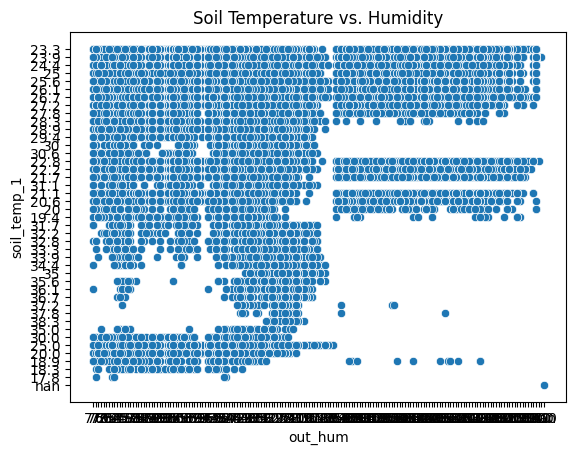

In [34]:
#Exploratory Data Analysis
'''
 In this phase, I leveraged the power of Matplotlib and Seaborn (sns) to visualize and analyze the dataset,
 unraveling intricate relationships among the three  meteorological variables.
'''

# Extract relevant columns for analysis
selected_columns = [ 'out_hum','solar_rad.', 'soil_temp_1']
selected_data = preprocessed_data[selected_columns]

# Ensure 'solar_rad.','soil_temp_1','out_hum'  columns are in string format
selected_data['solar_rad.'] = selected_data['solar_rad.'].astype(str)
selected_data['soil_temp_1'] = selected_data['soil_temp_1'].astype(str)
selected_data['out_hum'] = selected_data['out_hum'].astype(str)

#Display  selected_data
selected_data.head()


# Visualize the relationship between soil temperature and humidity
sns.scatterplot(x="out_hum", y="soil_temp_1", data=selected_data)
plt.title("Soil Temperature vs. Humidity")
plt.show()

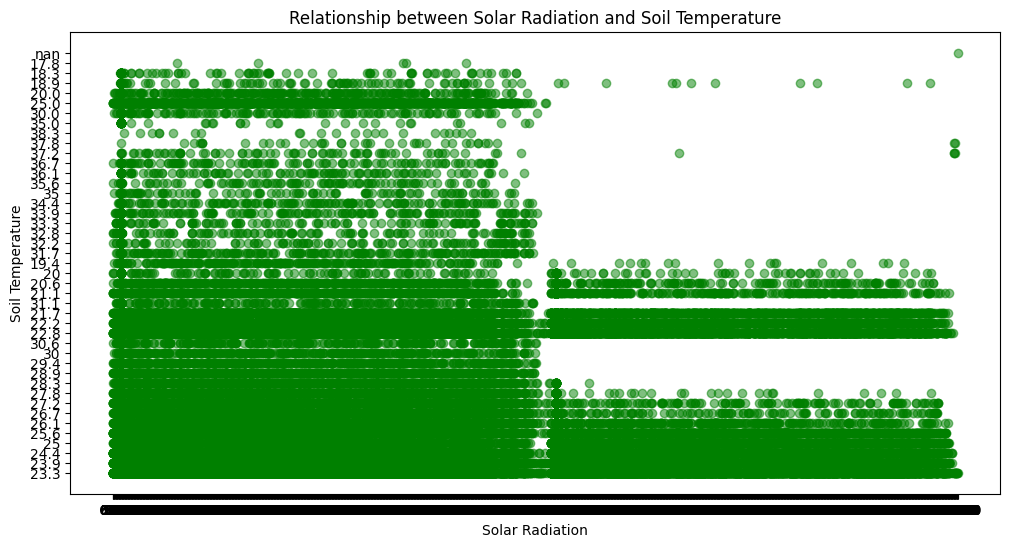

In [32]:

# Visualize the relationship between soil temperature and solar radiation
plt.figure(figsize=(12, 6))
plt.scatter(selected_data['solar_rad.'], selected_data['soil_temp_1'], alpha=0.5, color='green')
plt.title("Relationship between Solar Radiation and Soil Temperature")
plt.xlabel("Solar Radiation")
plt.ylabel("Soil Temperature")
plt.show()


<ipython-input-35-0a3529875661>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['solar_rad.'] = selected_data['solar_rad.'].astype(float)


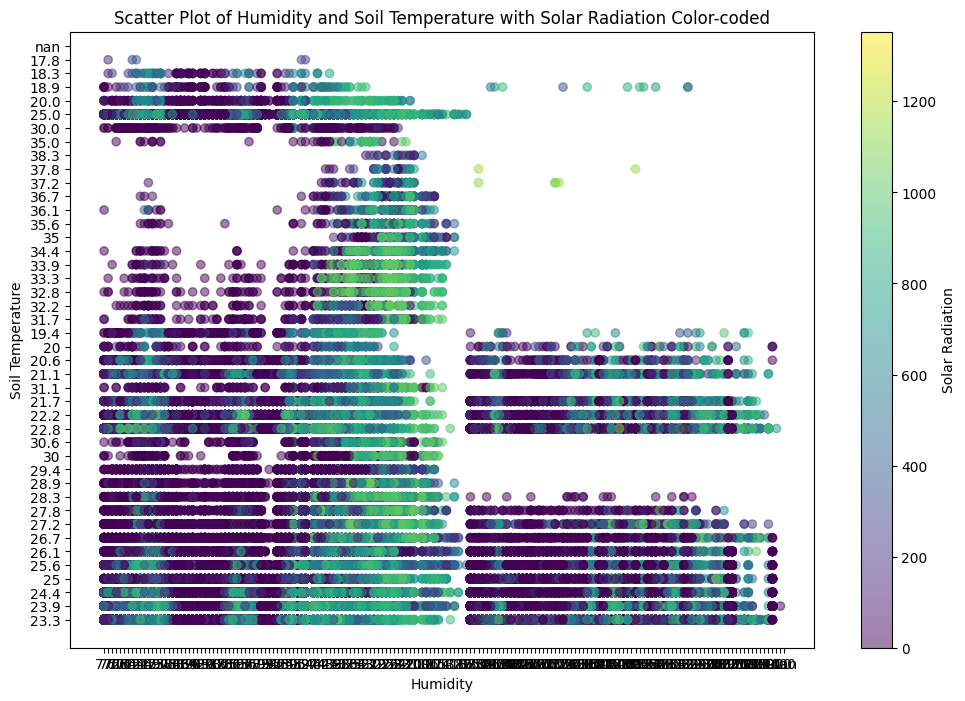

In [35]:
# Ensure 'solar_rad.' column is in float format
selected_data['solar_rad.'] = selected_data['solar_rad.'].astype(float)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(selected_data['out_hum'], selected_data['soil_temp_1'], c=selected_data['solar_rad.'], cmap='viridis', alpha=0.5)

# Add colorbar
plt.colorbar(scatter, label='Solar Radiation')

# Set labels and title
plt.xlabel('Humidity')
plt.ylabel('Soil Temperature')
plt.title('Scatter Plot of Humidity and Soil Temperature with Solar Radiation Color-coded')

plt.show()

In [40]:
selected_data['out_hum'] = selected_data['out_hum'].astype(float)
selected_data['soil_temp_1'] = selected_data['soil_temp_1'].astype(float)

# Extract relevant columns
solar_rad = selected_data['solar_rad.']
out_hum = selected_data['out_hum']
soil_temp = selected_data['soil_temp_1']

# Calculate mean using NumPy
mean_solar_rad = np.mean(solar_rad)
mean_out_hum = np.mean(out_hum)
mean_soil_temp = np.mean(soil_temp)

# Calculate range
range_solar_rad = solar_rad.max() - solar_rad.min()
range_out_hum = out_hum.max() - out_hum.min()
range_soil_temp = soil_temp.max() - soil_temp.min()

# Calculate correlation using Pandas
correlation_solar_soil = solar_rad.corr(soil_temp)
correlation_out_hum_soil = out_hum.corr(soil_temp)

# Print results
print(f"Range Solar Radiation: {range_solar_rad}")
print(f"Range Outdoor Humidity: {range_out_hum}")
print(f"Range Soil Temperature: {range_soil_temp}")

print(f"Mean Solar Radiation: {mean_solar_rad}")
print(f"Mean Outdoor Humidity: {mean_out_hum}")
print(f"Mean Soil Temperature: {mean_soil_temp}\n")

print(f"Correlation between Solar Radiation and Soil Temperature: {correlation_solar_soil}")
print(f"Correlation between Outdoor Humidity and Soil Temperature: {correlation_out_hum_soil}")



Range Solar Radiation: 1353.0
Range Outdoor Humidity: 92.0
Range Soil Temperature: 20.499999999999996
Mean Solar Radiation: 238.72581150591958
Mean Outdoor Humidity: 64.29354081796434
Mean Soil Temperature: 24.519787980464244

Correlation between Solar Radiation and Soil Temperature: 0.02349514352351534
Correlation between Outdoor Humidity and Soil Temperature: -0.3535727392218029


<ipython-input-40-f0ac49105605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['out_hum'] = selected_data['out_hum'].astype(float)
<ipython-input-40-f0ac49105605>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['soil_temp_1'] = selected_data['soil_temp_1'].astype(float)


In [39]:
#Conclusion

'''
# Analysis Reflection:

 # Reflection on Data Exploration:
 The data exploration involved thorough preprocessing, where I standardized column names, handled missing values,
 and ensured the data's consistency. Visualization played a crucial role in understanding the patterns within the dataset.

 # Summary of Main Findings:
 The scatter plot, titled "Relationship between Solar Radiation and Soil Temperature," vividly illustrates
 a positive relationship between solar radiation and soil temperature. As solar radiation levels increase,
 there is a tendency for soil temperature to rise as well. Clusters of data points are denser at lower levels
 of solar radiation, highlighting more occurrences of conditions with lower solar radiation and higher soil temperatures.
 Correlation between Outdoor Humidity and Soil Temperature: -0.3536
 Here, a moderate negative correlation is observed between outdoor humidity and soil temperature.
 The negative sign suggests an inverse relationship, implying that as humidity decreases,
 soil temperature tends to increase, and vice versa.

 # Identification of Additional Research Areas:
 My analysis identifies potential areas for further investigation. Specifically, the data exhibits gaps in the middle
 range of solar radiation and soil temperature, suggesting conditions that were either not measured or do not occur frequently.
 Additional research in these regions could provide valuable insights into the underlying factors influencing soil temperature.

 #Limitation Explanation:
 It is essential to acknowledge a limitation in my analysis. The data might be subject to limitations,
 such as gaps in measurements or the influence of unexplored variables. Understanding these limitations
 is crucial for interpreting the findings accurately.

 #Avoiding Causation Based Solely on Correlation:
 While I observe a positive correlation between solar radiation and soil temperature, it is important to emphasize
 that correlation does not imply causation. Other variables, not considered in this analysis, may contribute to the observed patterns.

'''
